# Library

In [14]:
import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import seaborn as sns

In [15]:
# fungsi membantu
def isNaN(value) :
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

In [16]:
def remove_outlier(df, column):
    q3,q1 = np.percentile(df.loc[:,column],[75,25])
    qr = q3 - q1

    max = q3+(1.5*qr)
    min = q1-(1.5*qr)

    df.loc[df[column] < min,column] = np.nan
    df.loc[df[column] > max,column] = np.nan
    return df

def remove_outlier_column_list(df, column_list):
    df_new = df.copy()
    for c in column_list:
        df_new = remove_outlier(df_new, c)
    return df_new

# Penjelasan Atribut

<table>
  <tr>
    <th>Num</th>
    <th>Attribute Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>title</td>
    <td>Title</td>
  </tr>
  <tr>
    <td>2</td>
    <td>artist</td>
    <td>Artist</td>
  </tr>
  <tr>
    <td>3</td>
    <td>genre</td>
    <td>Genre of the song</td>
  </tr>
  <tr>
    <td>4</td>
    <td>year</td>
    <td>Year of the song (due to re-releases, the year might not correspond to the release year of the original song)</td>
  </tr>
  <tr>
    <td>5</td>
    <td>bpm</td>
    <td>Beats per minute</td>
  </tr>
  <tr>
    <td>6</td>
    <td>nrgy</td>
    <td>Energy of a song, the higher the value the more energetic the song is</td>
  </tr>
  <tr>
    <td>7</td>
    <td>dnce</td>
    <td>The higher the value, the easier it is to dance to this song.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>dB</td>
    <td>The higher the value, the louder the song</td>
  </tr>
  <tr>
    <td>9</td>
    <td>live</td>
    <td>The higher the value, the more likely the song is a live recording.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>val</td>
    <td>The higher the value, the more positive the mood for the song.</td></tr>
  <tr>
    <td>11</td>
    <td>dur</td>
    <td>The duration of the song</td>
  </tr>
  <tr>
    <td>12</td>
    <td>acous</td>
    <td>The higher the value the more acoustic the song is.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>spch</td>
    <td>The higher the value the more spoken words the song contains.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>popularity</td>
    <td>The higher the value the more popular the song is.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>has_win_award</td>
    <td>Boolean value to indicate if the song has won an award or not. Value of 1 if the song has already won one or more awards otherwise 0 if the song hasn’t won any awards.</td>
  </tr>
</table>

# load all csv

In [17]:
df_1950 = pd.read_csv('1950.csv')
df_1960 = pd.read_csv('1960.csv')
df_1970 = pd.read_csv('1970.csv')
df_1980 = pd.read_csv('1980.csv')
df_1990 = pd.read_csv('1990.csv')
df_2000 = pd.read_csv('2000.csv')
df_2010 = pd.read_csv('2010.csv')
df_top10 = pd.read_csv('top10s.csv')
df_all = pd.read_csv('all_no_duplicates.csv')
df_clear = pd.read_csv('all_clean.csv')
df_all_super_genre = pd.read_csv('all_super_genre.csv')

In [5]:
df_all_super_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1336 non-null   object
 1   artist         1336 non-null   object
 2   genre          1336 non-null   object
 3   year           1336 non-null   int64 
 4   bpm            1336 non-null   int64 
 5   nrgy           1336 non-null   int64 
 6   dnce           1336 non-null   int64 
 7   dB             1336 non-null   int64 
 8   live           1336 non-null   int64 
 9   val            1336 non-null   int64 
 10  dur            1336 non-null   int64 
 11  acous          1336 non-null   int64 
 12  spch           1336 non-null   int64 
 13  popularity     1336 non-null   int64 
 14  has_win_award  1336 non-null   bool  
dtypes: bool(1), int64(11), object(3)
memory usage: 147.6+ KB


# Preprocessing (done)

Penggabungan seluruh data frame

In [6]:
df_all = pd.concat(\
    [df_1950,df_1960\
        ,df_1970,df_1980\
        ,df_1990,df_2000\
        ,df_2010,df_top10],ignore_index=True, sort=False)

df_all.to_csv('all_sort_from_1950_to_top10.csv',index=False)

# drop duplicate
df_all = df_all.drop_duplicates()
# drop all nan
df_clean = df_all.dropna()
# ubah data has_win_award dari float ke boolean
df_all = df_all.astype({"has_win_award":bool})
df_clean = df_clean.astype({"has_win_award":bool})

df_all.to_csv('all_no_duplicates.csv',index=False)
df_clean.to_csv('all_clean.csv',index=False)

super genre

In [7]:
def super_genre_helper(genre):
    genre_dict = {'blues': ['blues','african blues','blues rock','blues shouter','british blues','canadian blues','chicago blues','classic female blues','contemporary r&b','country blues','delta blues','detroit blues','electric blues','gospel blues','hill country blues','hokum blues','jump blues','kansas city blues','louisiana blues','memphis blues','new orleans blues','piedmont blues','punk blues','rhythm and blues','doo-wop','soul blues','st. louis blues','swamp blues','texas blues','west coast blues','acoustic blues','boy band'],
        'country': ['country','alternative country','cowpunk','americana','australian country','bakersfield sound','bluegrass','progressive bluegrass','reactionary bluegrass','country blues','country pop','country rap','country rock','cajun','cajun fiddle','christian country','close harmony','dansband','hokum','honky tonk','instrumental country','nashville sound','neotraditional country','new mexico music','outlaw country','progressive country','red dirt','rockabilly','hellbilly','psychobilly','sertanejo','tejano','texas country','traditional country music','truck-driving country','western (cowboy)','cowboy pop','new mexico','texas country','tejano','western swing','zydeco','cowboy western','contemporary country','classic country pop','alaska indie'],
        'easy listening': ['easy listening','background music','elevator music (muzak)','barococo','beautiful music','chill-out','furniture music','light music','lounge music','middle of the road','new-age music'],
        'electronic': ['electronic','ambient','ambient dub','dark ambient','ambient industrial','dungeon synth','isolationism','drone','illbient','new-age','andean new-age','neoclassical new-age','space music','reductionism','lowercase','onkyokei','bass music','footwork','future bass','kawaii future bass','jungle terror','uk bass','wave','hardwave','breakbeat','acid breaks','baltimore club','jersey club','philly club','big beat','breakbeat hardcore','4-beat','darkcore','hardcore breaks','broken beat','florida breaks','nu skool breaks','progressive breaks','psychedelic breakbeat','chill-out','downtempo','psybient','psydub','trip hop','trip rock','chopped and screwed','disco','afro/cosmic music','electro-disco','hi-nrg','eurobeat','eurodance','italo dance','italo disco','spacesynth','space disco','eurodisco','nu-disco','post-disco','boogie','city pop','disco edits','drum and bass','darkstep','drumfunk','drumstep','hardstep','intelligent drum and bass','atmospheric drum and bass','jazzstep','jump-up','liquid funk','neurofunk','sambass','techstep','dub','dub poetry','dubtronica','electroacoustic music','acousmatic music','electroacoustic improvisation','live electronics','musique concrète','soundscape','electronic rock','dance-rock','alternative dance','madchester','baggy','new rave','dance-punk','krautrock','new wave','cold wave','dark wave','neoclassical dark wave','neue deutsche todeskunst','ethereal wave','nu-gaze','minimal wave','neue deutsche welle','new romantic','sophisti-pop','synth-pop','dance-pop','disco polo','electroclash','electropop','hyperpop','indietronica','post-rock','space rock','synth-metal','electrogrind','electronicore','synth-punk','electronica','folktronica','jazztronica','laptronica','livetronica','progressive electronic','kosmische musik','ethnic electronica / regional edm','asian underground','african electronic dance music','afrobeats','azonto','coupé-décalé','kuduro','mahraganat','shangaan electro','budots','changa tuki','dancehall pop','funk carioca','funk ostentação','melodic funk','proibidão','rasteirinha','merenhouse','nortec','rabòday','rara tech','russ music','shamstep','tribal guarachero','worldbeat','manila sound','funk fusion genres','acid jazz','funktronica','synth-funk','jungle','ragga jungle','hardcore','bouncy techno','breakcore','raggacore','digital hardcore','doomcore','frenchcore','gabber','early hardcore','mainstream hardcore','happy hardcore','uk hardcore','industrial hardcore','j-core','lento violento','mákina','speedcore','extratone','flashcore','hypertone','splittercore','hardstyle','dubstyle','euphoric frenchcore','euphoric hardstyle','jumpstyle','rawstyle','trapstyle','hauntology','chillwave','hypnagogic pop','synthwave','darksynth','sovietwave','vaporwave','dreampunk','future funk','hardvapour','mallsoft','hip hop fusion genres','afroswing','alternative hip hop','hipster hop','cloud rap','crunk','crunkcore','snap music','electro','latin freestyle','emo rap','instrumental hip hop','lofi hip hop','miami bass','mumble rap','trap','afro trap','drill','uk drill','latin trap','phonk','trap (edm)','uk trap','house music','acid house','afro house','amapiano','gqom','kidandali','kwaito','ambient house','balearic beat','ballroom','bass house','blog house','brazilian bass','slap house','chicago hard house','chicago house','deep house','disco house','diva house','hardbag','electro house','big room house','complextro','dutch house','fidget house','melbourne bounce','electro swing','eurohouse','french house','funky house','future house','garage house','ghetto house','ghettotech','juke house','hip house','italo house','jazz house','latin house','melodic house','microhouse','moombahcore','moombahton','moombahsoul','new jersey sound','outsider house','progressive house','soulful house','tech house','tribal house','tropical house','uk hard house','hard nrg','pumping house','hardbass','scouse house','industrial / post-industrial','deconstructed club','electro-industrial','dark electro','aggrotech','electronic body music (ebm)','futurepop','new beat','industrial hip hop','industrial metal','cyber metal','neue deutsche härte','industrial rock','martial industrial','witch house','intelligent dance music (idm)',"drill 'n' bass",'glitch','glitch hop','neo soul','nightcore','noise music','danger music','harsh noise','harsh noise wall','japanoise','power electronics','death industrial','power noise','plunderphonics','sampledelia','techno','acid techno','ambient techno','birmingham sound','bleep techno','detroit techno','dub techno','hardtechno','free tekno','jungletek','raggatek','industrial techno','minimal techno','schaffel','toytown techno','tecno brega','trance music','acid trance','balearic trance','dream trance','eurotrance','hands up','goa trance','nitzhonot','hard trance','progressive trance','psychedelic trance','dark psytrance','full-on','minimal psytrance','progressive psytrance','suomisaundi','zenonesque','tech trance','uplifting trance','vocal trance','uk garage','2-step garage','bassline','breakstep','dubstep','brostep','post-dubstep','reggaestep','riddim','future garage','grime','grindie','speed garage','uk funky','funkstep','wonky','video game music','chiptune','bitpop','nintendocore','skweee','fm synthesis','sequencer music','afrobeat','german dance','big room','bubble trance','house','australian dance','belgian dance','belgian edm','aussietronica','brit funk','new wave pop','electronic trap','edm','metropopolis','bubblegum dance'],
        'contemporary folk': ['contemporary folk','american folk revival','americana','anti-folk','british folk revival','celtic music','chalga','corrido','filk','folk rock','celtic rock','freak folk','indie folk','industrial folk','mariachi','ranchera','neofolk','progressive folk','protest song','psychedelic folk','singer-songwriter','nueva canción','skiffle','sung poetry','yodeling','canadian folk','appalachian folk','drone folk','british folk','irish singer-songwriter','hollywood','native american','alaska indie'],
        'hip hop': ['hip hop','alternative hip hop','hipster hop','boom bap','bounce','british hip hop','road rap','chopped and screwed','chopper','cloud rap','comedy hip hop','crunk','crunkcore','country rap','east coast hip hop','emo rap','freestyle rap','g-funk','hardcore hip hop','dirty rap','gangsta rap','mafioso rap','horrorcore','memphis rap','hip hop soul','hyphy',"jerkin'",'industrial hip hop','instrumental hip hop','jazz rap','latin hip hop','chicano rap','lofi hip hop','miami bass','mumble rap','nerdcore','chap hop','new jack swing','political hip hop','conscious hip hop','pop rap','progressive rap','punk rap','ragga hip hop','rap opera','rap rock','rap metal','trap metal','rapcore','religious hip hop','christian hip hop','jewish hip hop','snap','southern hip hop','trap','drill','brooklyn drill','uk drill','latin trap','phonk','tread','turntablism','underground hip hop','west coast hip hop','bronx hip hop','g funk','dirty south rap','dfw rap','atl hip hop','chicago rap','australian hip hop','detroit hip hop','canadian hip hop','latin','canadian latin'],
        'jazz': ['jazz','acid jazz','afro-cuban jazz','alt-jazz','avant-garde jazz','bebop','boogie-woogie','bossa nova','brazilian jazz','british dance band','cape jazz','chamber jazz','continental jazz','cool jazz','crossover jazz','dixieland','ethno jazz','european free jazz','free funk','free improvisation','free jazz','gypsy jazz','hard bop','jazz blues','jazz-funk','jazz fusion','jazz rap','jazz rock','kansas city jazz','latin jazz','livetronica','m-base','mainstream jazz','modal jazz','neo-bop jazz','neo-swing','novelty ragtime','nu jazz','orchestral jazz','post-bop','progressive jazz','punk jazz','ragtime','samba-jazz','shibuya-kei','ska jazz','smooth jazz','soul jazz','straight-ahead jazz','stride jazz','swing','trad jazz','third stream','vocal jazz','west coast jazz'],
        'pop': ['pop','adult album alternative','adult contemporary','ambient pop','arabic pop','art pop','baroque pop','bedroom pop','brill building','britpop','bubblegum pop','c-pop','cantopop','hokkien pop','mandopop','canción','canzone','chalga','chamber pop','chanson','christian pop','classic hits','classical crossover','country pop','cringe pop','dance-pop','disco polo','electropop','europop','austropop','eurobeat','french pop','italo dance','italo disco','laïkó','nederpop','neomelodic music','russian pop','fado','folk pop','hyperpop','indie pop','twee pop','indian pop','iranian pop','j-pop','city pop','shibuya-kei','jangle pop','jazz pop','k-pop','korean hip hop','korean rock',"t'ong guitar",'trot','latin ballad','latin pop','mexican pop','new romantic','oldies','operatic pop','opm','pinoy pop','pop rap','pop rock','pop punk','emo pop','neon pop','power pop','soft rock','surf pop','yacht rock','pop soul','progressive pop','psychedelic pop','rebetiko','schlager','sophisti-pop','space age pop','sunshine pop','swamp pop','synthpop','teen pop','traditional pop','turbo-folk','turkish pop','vispop','wonky pop','worldbeat','yé-yé','adult standards','brill building pop','deep adult standards','british comedy','classic uk pop','afropop','classic danish pop','neo mellow','barbadian pop','bow pop','moroccan pop','indie poptimism','danish pop','belgian pop','italian pop','irish pop','colombian pop','acoustic pop','candy pop','folk-pop','dance pop','canadian pop','australian pop','australian talent show','french indie pop','classic country pop','latin','canadian latin'],
        'r&b and soul': ['r&b and soul','alternative r&b','contemporary r&b','disco','freestyle','go-go','funk','deep funk','minneapolis sound','psychedelic funk','gospel music','new jack swing','post-disco','boogie','rhythm and blues','doo-wop','soul','blue-eyed soul','hip hop soul','neo soul','northern soul','psychedelic soul','southern soul','classic soul','beach music','boogaloo','canadian contemporary r&b','british soul','chicago soul','r&b','classic girl group','escape room','hip pop','boy band'],
        'rock': ['rock','afro rock','alternative rock','alternative dance','britpop','post-britpop','dream pop','goth rock','shoegaze','blackgaze','grunge','post-grunge','indie rock','dunedin sound','math rock','post-punk revival','madchester','baggy','noise pop','sadcore','slowcore','beat','british invasion','freakbeat','nederbeat','blues rock','boogie rock','british rhythm and blues','chamber pop','christian rock','classic rock','comedy rock','country rock','dark cabaret','electronic rock','electronicore','new wave','cold wave','dark wave','ethereal wave','experimental rock','art rock','industrial rock','post-punk','dance-punk','gothic rock','no wave','noise rock','post-rock','post-metal','folk rock','british folk rock','celtic rock','medieval folk rock','funk rock','garage rock','glam rock','hard rock','heartland rock','instrumental rock','jazz fusion','jazz rock','latin rock','mangue bit','metal','paisley underground','desert rock','pop rock','jangle pop','power pop','soft rock','yacht rock','progressive rock','art rock','avant-prog','rock in opposition','canterbury scene','flamenco rock','krautrock','neo-progressive rock','new prog','post-progressive','space rock','symphonic rock','psychedelic rock','acid rock','neo-psychedelia','raga rock','pub rock (australia)','pub rock (united kingdom)','punk rock','rap rock','rapcore','reggae rock','rock and roll','rockabilly','rock opera','roots rock','southern rock','stoner rock','swamp rock','sufi rock','surf rock','tropical rock','visual kei','nagoya kei','wizard rock','worldbeat','world fusion','merseybeat','album rock','rock-and-roll','australian rock','dance rock','glam punk','german alternative rock','modern rock','mellow gold','permanent wave'],
        'metal': ['metal','alternative metal','funk metal','nu metal','rap metal','avant-garde metal','black metal','blackened death metal','atmospheric black metal','blackgaze','melodic black metal','national socialist black metal','symphonic black metal','viking metal','war metal','christian metal','unblack metal','death metal',"death 'n' roll",'deathgrind','melodic death metal','technical death metal','doom metal','death-doom','drone metal','folk metal','celtic metal','medieval metal','pagan metal','glam metal','gothic metal','heavy metal','industrial metal','kawaii metal','latin metal','metalcore','deathcore','mathcore','melodic metalcore','neoclassical metal','neue deutsche härte','nintendocore','pirate metal','post-metal','power metal','progressive metal','djent','sludge metal','speed metal','symphonic metal','thrash metal','crossover thrash','groove metal'],
        'punk': ['punk','anarcho punk','crust punk','d-beat','art punk','christian punk','deathrock','digital hardcore','folk punk','celtic punk','cowpunk','gypsy punk','garage punk','grindcore','crustgrind','goregrind','noisegrind','pornogrind','hardcore punk','crossover thrash','melodic hardcore','post-hardcore','emo','emo pop','screamo','powerviolence','street punk','thrashcore','horror punk','nazi punk','oi!','pop punk','easycore','neon pop','psychobilly','punk pathetique','riot grrrl','ska punk','skate punk']}
    genre_list = ''
    found = False
    for k,v in genre_dict.items():
        if genre in v:
            if genre_list == '': genre_list+=k
            else: genre_list += '|'+k
            found = True
    if not found: return genre
    return genre_list

def super_genre(df):
    df_tmp = df.copy()
    for i in tqdm.tqdm(df_tmp.index):
        df_tmp.loc[i,'genre'] = super_genre_helper(df_tmp.loc[i,'genre'])
    return df_tmp

genre_all = ['blues','country','easy listening','electronic','contemporary folk','hip hop','jazz','pop','r&b and soul','rock','metal','punk']

In [8]:
df_all_super_genre = super_genre(df_clean)

multi_genre = df_all_super_genre.loc[df_all_super_genre['genre'].str.contains('\|', case=False)]
df_all_super_genre = df_all_super_genre[df_all_super_genre["genre"].str.contains('\|') == False]

for i, r in tqdm.tqdm(multi_genre.iterrows()):
    genre_list = r['genre'].split('|')
    new_row = r.to_dict()
    for g in genre_list:
        new_row['genre'] = g
        df_all_super_genre = df_all_super_genre.append(new_row, ignore_index=True)

100%|██████████| 1249/1249 [00:01<00:00, 966.51it/s]
0it [00:00, ?it/s]/tmp/ipykernel_89882/1118250192.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_super_genre = df_all_super_genre.append(new_row, ignore_index=True)
/tmp/ipykernel_89882/1118250192.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_super_genre = df_all_super_genre.append(new_row, ignore_index=True)
1it [00:01,  1.10s/it]/tmp/ipykernel_89882/1118250192.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_super_genre = df_all_super_genre.append(new_row, ignore_index=True)
/tmp/ipykernel_89882/1118250192.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

In [9]:
df_all_super_genre.to_csv('all_super_genre.csv',index=False)
df_all_super_genre['genre'].unique()

array(['pop', 'r&b and soul', 'blues', 'jazz', 'rock',
       'contemporary folk', 'country', 'electronic', 'metal', 'hip hop'],
      dtype=object)

In [10]:
# cek duplikasi
print(sum(df_all.duplicated()))

0


In [11]:
# cek null di kolom yang mana
def cek_apakah_ada_null(data_frame):
    cek = data_frame.isnull()
    columns = list(cek.columns)
    c_null = []
    for i in columns:
        if sum(cek[i]) != 0:
            c_null.append(i)
    return c_null

In [12]:
print(cek_apakah_ada_null(df_all))

['genre']


<AxesSubplot:>

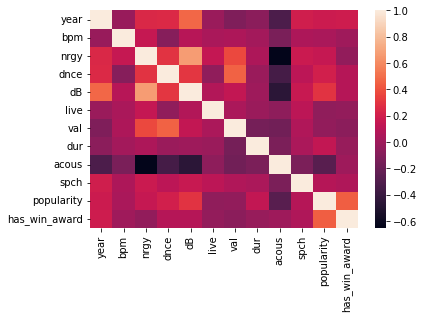

In [13]:
sns.heatmap(df_all.corr())

Hanya energy, dB, dan acoustic saja yang dapat mendeskripsikan sebuah lagu

In [14]:
attribute_spotify_high_corr = ["nrgy","dB","acous"]

# Clustering

scaler

In [15]:
# buat scaler
def scaler_spotify(df, attribute_spotify):
    sc = MinMaxScaler()
    data_scaled = sc.fit_transform(df.loc[:,attribute_spotify])
    return data_scaled

def scaler_spotify_with_PCA(df, attribute_spotify):
    sc = MinMaxScaler()
    data_scaled = sc.fit_transform(df.loc[:,attribute_spotify])
    pca = PCA(n_components=0.95)
    pca.fit(data_scaled)
    data_scaled = pca.transform(data_scaled)
    return data_scaled

In [16]:
# menggunakan clustering kmeans
# mencari nilai optimal dari k
def optimal_kmeans(scaled_data):
    sil = []
    k = range(2,25)
    for i in k:
        cluster_data = KMeans(n_clusters=i)\
            .fit(scaled_data)
        sil.append(silhouette_score(scaled_data\
            ,cluster_data.labels_,metric='euclidean'))
    plt.plot(k,sil, "bx-")
    plt.xlabel("K")
    plt.ylabel("sil")
    plt.show()
    return sil.index(max(sil))+2

In [7]:
attribute_spotify = ['title','artist','genre','year','bpm','nrgy','dnce','dB','live','val','dur','acous','spch','popularity','has_win_award']

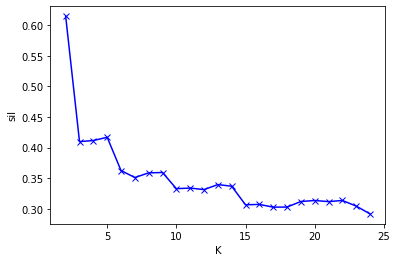

2


In [18]:
df_all_std = scaler_spotify(df_all, attribute_spotify_high_corr)
k = optimal_kmeans(df_all_std)
df_all_cd = KMeans(n_clusters=k).fit_predict(df_all_std)
df_all_cluster = df_all.copy()
df_all_cluster['cluster'] = df_all_cd
print(k)

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(df_all.loc[:,attribute_spotify_high_corr], df_all_cd, metric='euclidean')

0.6203765854379533

## Plot clustering

In [20]:
label_0 = df_all_cluster.loc[df_all_cluster['cluster'] == 0]
label_1 = df_all_cluster.loc[df_all_cluster['cluster'] == 1]
label_2 = df_all_cluster.loc[df_all_cluster['cluster'] == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

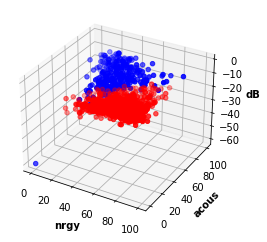

In [21]:
plot3d = plt.axes(projection='3d')
plot3d.set_xlabel('nrgy', fontweight ='bold')
plot3d.set_ylabel('acous', fontweight ='bold')
plot3d.set_zlabel('dB', fontweight ='bold')
plot3d.scatter3D(label_0['nrgy'], label_0['acous'], label_0['dB'], color='red')
plot3d.scatter3D(label_1['nrgy'], label_1['acous'], label_1['dB'], color='blue')
plot3d.scatter3D(label_2['nrgy'], label_2['acous'], label_2['dB'], color='green')
plt.show

# Kajian isi data

Artis yang populer

In [22]:
sum(df_top10.duplicated())

0

In [23]:
artist_total = pd.unique(df_all.loc[:,'artist'])
print("Total Artist : %d" % (len(artist_total)))

Total Artist : 589


In [24]:
genre_total = pd.unique(df_all.loc[:,'genre'])
print("Total Genre : %d" % (len(genre_total)))

Total Genre : 137


In [25]:
df_all['artist'].value_counts()

Rihanna              21
Katy Perry           20
Justin Bieber        18
Maroon 5             16
Bruno Mars           15
                     ..
Van Halen             1
Eric Carmen           1
Michael Sembello      1
Bruce Springsteen     1
R3HAB                 1
Name: artist, Length: 589, dtype: int64

Artis yang paling populer dapat dihitung dari jumlah nilai lagu yang populer

In [26]:
def dict_artist_popularity(df):
    artist_popularity = dict()
    for i in df.index:
        artist = df['artist'][i]
        popularity = df['popularity'][i]
        artist_popularity[artist] = artist_popularity.setdefault(artist,0)\
            + popularity
    return artist_popularity

In [27]:
artis_populer = dict_artist_popularity(df_all.loc[df_all['year'] == 2010])
max(artis_populer, key=artis_populer.get)

'Bruno Mars'

Mencari genre lagu yang populer dapat menggunakan hal yang sama saat mencari artis yang paling populer

In [28]:
def dict_genre_popularity(df):
    genre_popularity = dict()
    for i in df.index:
        genre = df['genre'][i]
        popularity = df['popularity'][i]
        genre_popularity[genre] = genre_popularity.setdefault(genre,0)\
            + popularity
    return genre_popularity

In [29]:
genre_populer = dict_genre_popularity(df_top10[df_top10['year'] == 2010])
max(genre_populer, key=genre_populer.get)

'dance pop'

Untuk melakukan list genre musik dari artis dapat dilakukan dengan melakukan list setiap artis

In [30]:
def dict_artist_genre(df):
    artist_genre = dict()
    for i in df.index:
        artist = df['artist'][i]
        genre = df['genre'][i]
        if isNaN(genre):
            artist_genre.setdefault(artist,set())
            continue
        artist_genre.setdefault(artist,set()).add(genre)
    return artist_genre

In [31]:
def dict_artist_music(df):
    artist_music = dict()
    for i in df.index:
        artist = df['artist'][i]
        music = df['title'][i]
        if isNaN(music):
            artist_music.setdefault(artist,set())
            continue
        artist_music.setdefault(artist,set()).add(music)
    return artist_music

In [32]:
def dict_genre_music(df):
    genre_music = dict()
    for i in df.index:
        genre = df['genre'][i]
        music = df['title'][i]
        if isNaN(music):
            genre_music.setdefault(genre,set())
            continue
        genre_music.setdefault(genre,set()).add(music)
    return genre_music

In [33]:
artist_genre = dict_artist_genre(df_all)

for i in artist_genre.keys():
    artist_genre[i] = len(artist_genre[i])

genre_max = max(artist_genre.values())
genre_max

2

In [34]:
music = dict_artist_music(df_all)
df_all.loc[df_all['artist'] == 'Taylor Swift']

,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,popularity,has_win_award
494,I Knew You Were Trouble.,Taylor Swift,dance pop,2012,77,47,62,-7,3,68,220,0,4,75,False
508,We Are Never Ever Getting Back Together,Taylor Swift,dance pop,2012,86,68,63,-6,12,75,193,1,9,73,False
509,Love Story,Taylor Swift,dance pop,2008,119,74,62,-4,8,31,236,13,3,73,False
552,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,dance pop,2006,100,42,62,-7,12,29,203,29,2,61,False
645,Wildest Dreams,Taylor Swift,dance pop,2014,140,66,55,-7,11,47,220,7,7,71,False
776,I Knew You Were Trouble.,Taylor Swift,pop,2012,77,47,62,-7,3,68,220,0,4,77,False
780,We Are Never Ever Getting Back Together,Taylor Swift,pop,2012,86,68,63,-6,12,75,193,1,9,75,False
819,We Are Never Ever Getting Back Together,Taylor Swift,pop,2013,86,68,63,-6,12,75,193,1,9,75,False
882,Shake It Off,Taylor Swift,pop,2014,160,80,65,-5,33,94,219,6,17,78,False
1074,Out Of The Woods,Taylor Swift,pop,2016,92,84,55,-7,34,34,236,0,4,66,False


Pengaruh durasi waktu dengan popularitas lagu

In [35]:
df_durr_popularity = df_all.loc[:,["dur","popularity"]]
df_durr_popularity.corr()

,dur,popularity
dur,1.00000,0.13945
popularity,0.13945,1.00000


# Klasifikasi Genre Lagu

<function matplotlib.pyplot.show(close=None, block=None)>

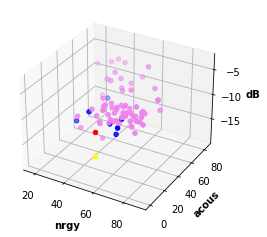

In [36]:
label_0 = df_all_cluster.loc[df_all_cluster['genre'] == 'blues']
label_1 = df_all_cluster.loc[df_all_cluster['genre'] == 'contemporary folk']
label_2 = df_all_cluster.loc[df_all_cluster['genre'] == 'country']
label_3 = df_all_cluster.loc[df_all_cluster['genre'] == 'electronic']
label_4 = df_all_cluster.loc[df_all_cluster['genre'] == 'hip hop']
label_5 = df_all_cluster.loc[df_all_cluster['genre'] == 'jazz']
label_6 = df_all_cluster.loc[df_all_cluster['genre'] == 'metal']
label_7 = df_all_cluster.loc[df_all_cluster['genre'] == 'pop']
label_8 = df_all_cluster.loc[df_all_cluster['genre'] == 'r&b and soul']
label_9 = df_all_cluster.loc[df_all_cluster['genre'] == 'rock']

plot3d = plt.axes(projection='3d')
plot3d.set_xlabel('nrgy', fontweight ='bold')
plot3d.set_ylabel('acous', fontweight ='bold')
plot3d.set_zlabel('dB', fontweight ='bold')
plot3d.scatter3D(label_0['nrgy'], label_0['acous'], label_0['dB'], color='red')
plot3d.scatter3D(label_1['nrgy'], label_1['acous'], label_1['dB'], color='orange')
plot3d.scatter3D(label_2['nrgy'], label_2['acous'], label_2['dB'], color='yellow')
plot3d.scatter3D(label_3['nrgy'], label_3['acous'], label_3['dB'], color='green')
plot3d.scatter3D(label_4['nrgy'], label_4['acous'], label_4['dB'], color='blue')
plot3d.scatter3D(label_5['nrgy'], label_5['acous'], label_5['dB'], color='cyan')
plot3d.scatter3D(label_6['nrgy'], label_6['acous'], label_6['dB'], color='magenta')
plot3d.scatter3D(label_7['nrgy'], label_7['acous'], label_7['dB'], color='violet')
plot3d.scatter3D(label_8['nrgy'], label_8['acous'], label_8['dB'], color='indigo')
plot3d.scatter3D(label_9['nrgy'], label_9['acous'], label_9['dB'], color='black')
plt.show

In [37]:
print(Counter(df_all_super_genre['genre']))
for g in genre_all:
    count = df_all_super_genre.index[df_all_super_genre['genre'] == g].tolist()
    print(g, len(count))

Counter({'pop': 804, 'rock': 171, 'electronic': 128, 'r&b and soul': 93, 'hip hop': 62, 'blues': 41, 'contemporary folk': 15, 'country': 11, 'metal': 6, 'jazz': 5})
blues 41
country 11
easy listening 0
electronic 128
contemporary folk 15
hip hop 62
jazz 5
pop 804
r&b and soul 93
rock 171
metal 6
punk 0


In [18]:
unpopular = ['jazz', 'metal', 'easy listening', 'punk', 'country', 'contemporary folk']
df_popular = df_all_super_genre.loc[df_all_super_genre['genre'] != unpopular[0]]
for u in unpopular:
    df_popular = df_popular.loc[df_popular['genre'] != u]

In [19]:
remove_list = ['title','artist','year','genre']
attribute_spotify_genre = attribute_spotify.copy()
for r in remove_list:
    attribute_spotify_genre.remove(r)

In [20]:
X = df_all_super_genre.loc[:,attribute_spotify_genre]
y = df_all_super_genre['genre']

# define pipeline
steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


F1 Score: 0.472


In [26]:
X = df_all_super_genre.loc[:,attribute_spotify_genre]
y = df_all_super_genre['genre']

# define pipeline
steps = [('over', SMOTE(k_neighbors=3)), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('F1 Score: %.3f' % np.mean(scores))

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


F1 Score: 0.366


In [27]:
X = df_popular.loc[:,attribute_spotify_genre]
y = df_popular['genre']

# define pipeline
steps = [('over', ADASYN(n_neighbors=3)), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('F1 Score: %.3f' % np.mean(scores))

F1 Score: 0.405


# Pemenang award

In [43]:
award = df_all_super_genre['has_win_award'].unique()
for w in award:
    count = df_all_super_genre.index[df_all_super_genre['has_win_award'] == w].tolist()
    if w: print('has win', len(count))
    else: print('has not win', len(count))

has not win 1194
has win 142


In [44]:
remove_list = ['title','artist','year','genre','has_win_award']
attribute_spotify_award = attribute_spotify.copy()
for r in remove_list:
    attribute_spotify_award.remove(r)

In [45]:
X = df_all.loc[:,attribute_spotify_award]
y = df_all['has_win_award']

# define pipeline
steps = [('over', RandomOverSampler(sampling_strategy='minority')), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = np.mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.984


In [46]:
X = df_all.loc[:,attribute_spotify_award]
y = df_all['has_win_award']

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('F1 Score: %.3f' % np.mean(scores))

F1 Score: 0.984


In [47]:
X = df_all.loc[:,attribute_spotify_award]
y = df_all['has_win_award']

# define pipeline
steps = [('over', ADASYN()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
print('F1 Score: %.3f' % np.mean(scores))

F1 Score: 0.985


# Prediksi popularitas

Jika dilihat dari nilai korelasi yang dimiliki, maka fitur dnce, dB, dan acous miliki nilai yang tinggi

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='acous', ylabel='popularity'>,
        <AxesSubplot:xlabel='dB', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='acous'>,
        <AxesSubplot:xlabel='acous', ylabel='acous'>,
        <AxesSubplot:xlabel='dB', ylabel='acous'>],
       [<AxesSubplot:xlabel='popularity', ylabel='dB'>,
        <AxesSubplot:xlabel='acous', ylabel='dB'>,
        <AxesSubplot:xlabel='dB', ylabel='dB'>]], dtype=object)

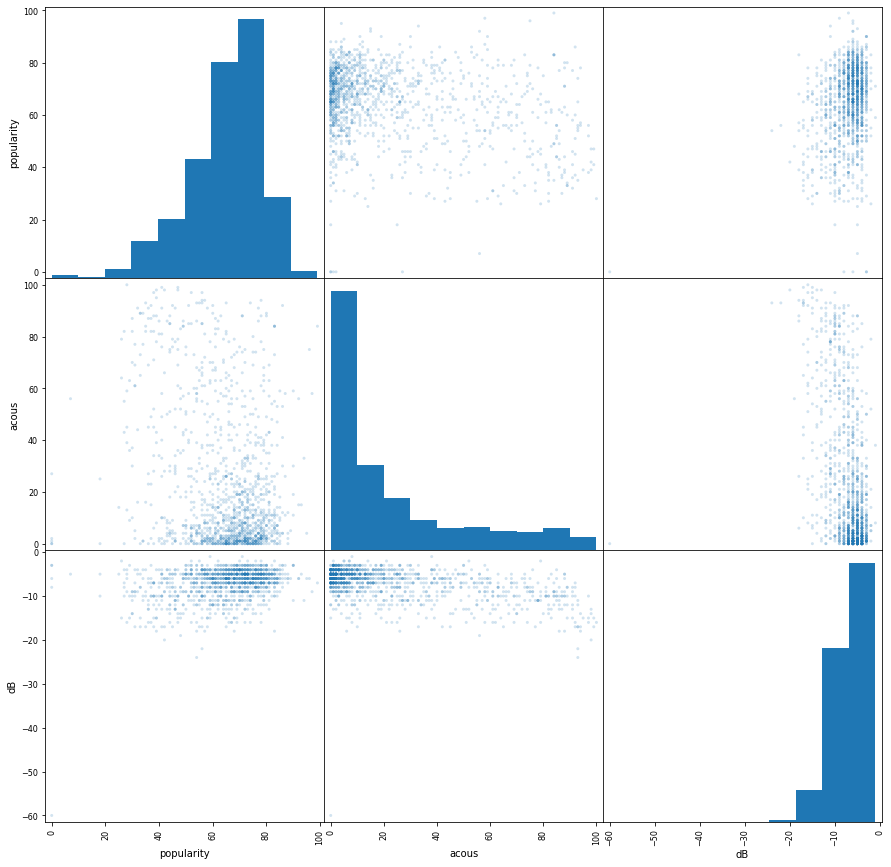

In [48]:
attribute_spotify_popularity = ['popularity','acous','dB']
df_popularity = df_all.loc[:,attribute_spotify_popularity]
pd.plotting.scatter_matrix(df_popularity, alpha=0.2, figsize=(15,15))

array([[<AxesSubplot:xlabel='popularity', ylabel='popularity'>,
        <AxesSubplot:xlabel='acous', ylabel='popularity'>,
        <AxesSubplot:xlabel='dB', ylabel='popularity'>],
       [<AxesSubplot:xlabel='popularity', ylabel='acous'>,
        <AxesSubplot:xlabel='acous', ylabel='acous'>,
        <AxesSubplot:xlabel='dB', ylabel='acous'>],
       [<AxesSubplot:xlabel='popularity', ylabel='dB'>,
        <AxesSubplot:xlabel='acous', ylabel='dB'>,
        <AxesSubplot:xlabel='dB', ylabel='dB'>]], dtype=object)

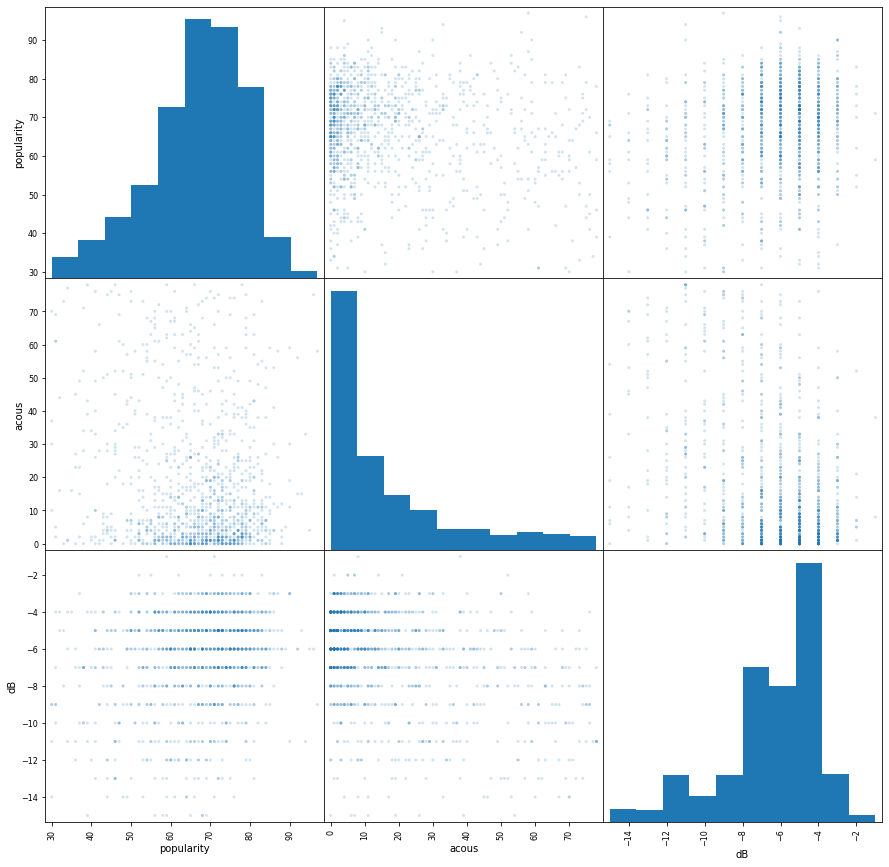

In [49]:
df_popularity = remove_outlier_column_list(df_popularity, attribute_spotify_popularity)
df_popularity = df_popularity.dropna()
pd.plotting.scatter_matrix(df_popularity, alpha=0.2, figsize=(15,15))

In [50]:
df_popularity.shape

(1140, 3)

In [61]:
X = np.array(df_popularity.loc[:,['acous']])
y = np.array(df_popularity.loc[:,['dB']])

linear_r = LinearRegression()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(linear_r, X, y, scoring='r2', cv=cv, n_jobs=-1)
print('R2: %.3f' % np.mean(scores))

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


R2: 0.144


In [59]:
X = np.array(df_popularity.loc[:,['dB']])
y = np.array(df_popularity.loc[:,['popularity']])

logistic_r = LogisticRegression()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logistic_r, X, y, scoring='r2', cv=cv, n_jobs=-1)
print('R2: %.3f' % np.mean(scores))

/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or

R2: -0.194


/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sebelum_masehi/Documents/Ilmu Komputer UI/Data Science and Analytics/tugas_akhir/tugas_akhir_spotify/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/st

In [53]:
X = np.array(df_all.loc[:,attribute_spotify_popularity])
y = np.array(df_all.loc[:,'popularity'])

lr_popularity = LinearRegression().fit(X,y)

In [54]:
lr_popularity.score(X,y)

1.0

In [55]:
lr_popularity.coef_

array([ 1.00000000e+00, -1.11719198e-16,  2.82643307e-17])

In [56]:
lr_popularity.intercept_

2.842170943040401e-14